In [ ]:
#importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#loading the Dataset
data = pd.read_csv('Titanic-Dataset.csv')
print(data.head(5))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [ ]:
#Understanding And Cleaning the Dataset
print("There are following columns in the dataset",data.columns)
print("Description about the following dataset",data.info())
print("Rowsand Columns in the Datset",data.shape)


There are following columns in the dataset Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Description about the following dataset None
Row

In [ ]:
print("NUll VALUES IN EACH COLUMN\n",data.isnull().sum())
print(data.fillna(0))
#print(data.drop(['Cabin'],axis=1,inplace=True))
print(data.drop_duplicates())

NUll VALUES IN EACH COLUMN
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  

In [ ]:
#DESCRIPTIVE ANALYSIS OF THE DATASET
print(data.describe(include='object'))
for cols in data.describe(include='object').columns:
  print(cols)
  print(data[cols].unique())
  print('-'*50)

                           Name   Sex  Ticket Embarked
count                       891   891     891      889
unique                      891     2     681        3
top     Braund, Mr. Owen Harris  male  347082        S
freq                          1   577       7      644
Name
['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' '

342
342


<ipython-input-31-b82c604be0dd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=data, palette='Set2')


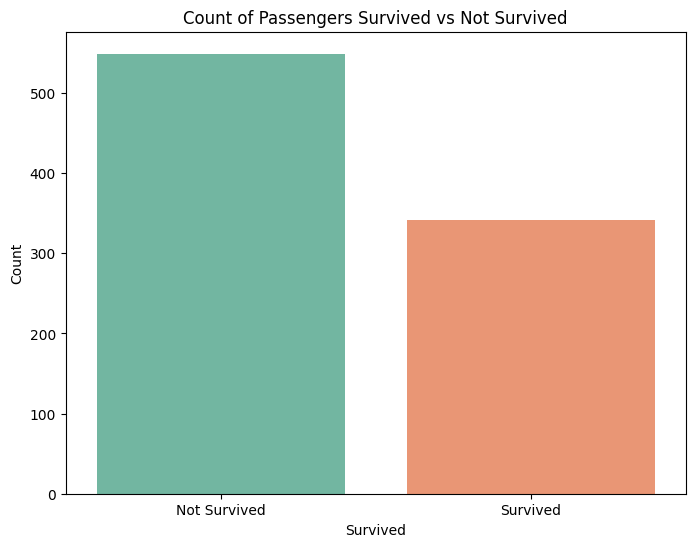

In [ ]:
survived_count = data[data['Survived'] == 1].shape[0]
print(survived_count)
not_survived_count = data[data['Survived'] == 1].shape[0]
print(not_survived_count)
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=data, palette='Set2')
plt.title('Count of Passengers Survived vs Not Survived')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

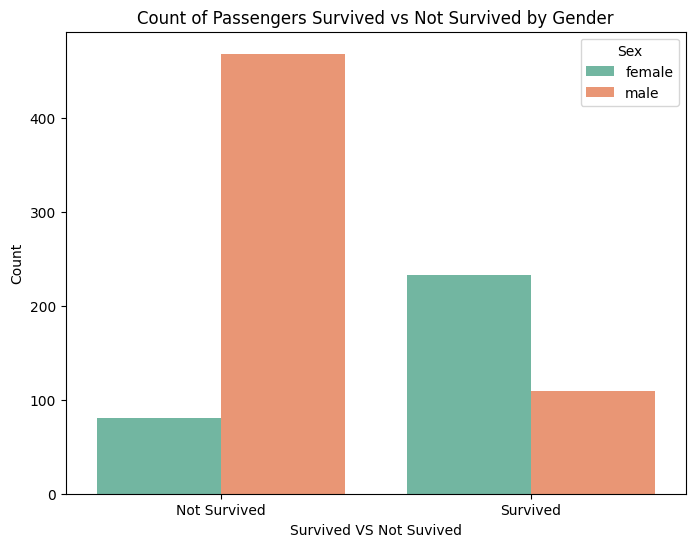

In [ ]:
gender_survived = data.groupby(['Survived', 'Sex']).size().reset_index(name='Count')
plt.figure(figsize=(8, 6))
sns.barplot(x='Survived', y='Count', hue='Sex', data=gender_survived, palette='Set2')
plt.title('Count of Passengers Survived vs Not Survived by Gender')
plt.xlabel('Survived VS Not Suvived')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.legend(title='Sex')
plt.show()

    Survived  SibSp  Count
0          0      0    398
1          0      1     97
2          0      2     15
3          0      3     12
4          0      4     15
5          0      5      5
6          0      8      7
7          1      0    210
8          1      1    112
9          1      2     13
10         1      3      4
11         1      4      3


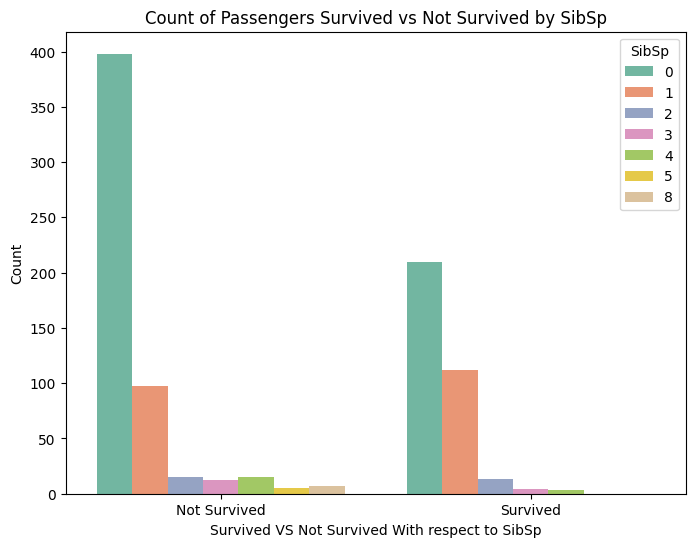

In [ ]:
SibSp_survived = data.groupby(['Survived', 'SibSp']).size().reset_index(name='Count')
print(SibSp_survived)
plt.figure(figsize=(8, 6))
sns.barplot(x='Survived', y='Count', hue='SibSp', data=SibSp_survived, palette='Set2')
plt.title('Count of Passengers Survived vs Not Survived by SibSp')
plt.xlabel('Survived VS Not Survived With respect to SibSp')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.legend(title='NUmber of SibSp')
plt.show()